In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
crime_data = gpd.read_file('/Users/tianming_liu/00Self/CE/0017 Web Architecture/Final/CE-WEB-ARCHITECTURE-TECH-TITANS/data/crime data/MPS LSOA Level Crime Last 24 Months.csv')

,field_1,field_2,field_3,field_4,field_5,field_6,field_7,field_8,field_9,field_10,...,field_21,field_22,field_23,field_24,field_25,field_26,field_27,field_28,field_29,geometry
0,LSOA Code,LSOA Name,Borough,Major Category,Minor Category,202110,202111,202112,202201,202202,...,202301,202302,202303,202304,202305,202306,202307,202308,202309,None
1,E01000006,Barking and Dagenham 016A,Barking and Dagenham,Arson and Criminal Damage,Criminal Damage,0,0,1,2,1,...,0,0,1,1,0,0,2,0,0,None
2,E01000006,Barking and Dagenham 016A,Barking and Dagenham,Burglary,Domestic Burglary,1,1,1,0,0,...,0,0,0,1,0,0,0,1,0,None
3,E01000006,Barking and Dagenham 016A,Barking and Dagenham,Drug Offences,Drug Trafficking,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,None
4,E01000006,Barking and Dagenham 016A,Barking and Dagenham,Drug Offences,Possession of Drugs,1,3,2,5,2,...,0,0,0,0,0,1,0,2,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102228,E01033746,Greenwich 038E,Greenwich,Vehicle Offences,Interfering with a Motor Vehicle,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,None
102229,E01033746,Greenwich 038E,Greenwich,Vehicle Offences,Theft from a Motor Vehicle,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,None
102230,E01033746,Greenwich 038E,Greenwich,Vehicle Offences,Theft or Taking of a Motor Vehicle,0,0,0,0,0,...,1,0,2,0,0,1,1,0,0,None
102231,E01033746,Greenwich 038E,Greenwich,Violence Against the Person,Violence with Injury,1,1,0,0,0,...,0,0,0,0,0,2,1,0,0,None


In [9]:
lsoa = gpd.read_file('/Users/tianming_liu/00Self/CE/0017 Web Architecture/Final/CE-Web-Architecture-Tech-Titans/data/london lsoa shapefile/LSOA_2011_London_gen_MHW.shp')

In [3]:
crs = lsoa.crs
print("坐标格式:", crs)

坐标格式: PROJCS["OSGB36 / British National Grid",GEOGCS["OSGB36",DATUM["Ordnance_Survey_of_Great_Britain_1936",SPHEROID["Airy 1830",6377563.396,299.3249646,AUTHORITY["EPSG","7001"]],AUTHORITY["EPSG","6277"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",49],PARAMETER["central_meridian",-2],PARAMETER["scale_factor",0.999601272],PARAMETER["false_easting",400000],PARAMETER["false_northing",-100000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [10]:
# 指定坐标转换为EPSG:4326（WGS 84）
lsoa = lsoa.to_crs(epsg=4326)

In [11]:
lsoa.to_file('/Users/tianming_liu/00Self/CE/0017 Web Architecture/Final/CE-Web-Architecture-Tech-Titans/data/london lsoa shapefile/LSOA London WGS4326.shp')

In [7]:
# 选择要导出的列（示例中选择 'column1'、'column2'、'column3'）
selected_columns = lsoa[['LSOA11CD', 'LSOA11NM', 'POPDEN']]

# 添加包含 WKT 格式的几何数据的列
selected_columns['geometry_wkt'] = lsoa['geometry'].apply(lambda geom: geom.wkt)

/var/folders/xr/5y1vrstd6rj_w1xfslg4n3mc0000gn/T/ipykernel_39057/2642819686.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['geometry_wkt'] = lsoa['geometry'].apply(lambda geom: geom.wkt)


In [8]:
selected_columns.to_csv("LSOA_London_4326.csv", index=False)

In [5]:
lsoa

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,0,112.9,876,1.7,"POLYGON ((532105.092 182011.230, 532162.491 18..."
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,0,62.9,830,1.7,"POLYGON ((532746.813 181786.891, 532671.688 18..."
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,96,227.7,817,1.5,"POLYGON ((532135.145 182198.119, 532158.250 18..."
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,0,52.0,467,2.1,"POLYGON ((533807.946 180767.770, 533649.063 18..."
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,4,116.2,543,3.1,"POLYGON ((545122.049 184314.931, 545271.917 18..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,E01033742,Greenwich 007F,E02000319,Greenwich 007,E09000011,Greenwich,E12000007,London,1352,1352,0,107.6,581,2.3,"POLYGON ((544642.680 179824.674, 544766.313 17..."
4831,E01033743,Greenwich 002H,E02000314,Greenwich 002,E09000011,Greenwich,E12000007,London,2038,2038,0,20.4,663,3.1,"POLYGON ((546579.195 181097.813, 546687.036 18..."
4832,E01033744,Greenwich 007G,E02000319,Greenwich 007,E09000011,Greenwich,E12000007,London,1845,1728,117,125.8,646,2.7,"POLYGON ((544536.486 179447.115, 544602.630 17..."
4833,E01033745,Greenwich 002I,E02000314,Greenwich 002,E09000011,Greenwich,E12000007,London,1820,1820,0,32.3,591,3.1,"POLYGON ((546415.745 180152.270, 546320.715 18..."


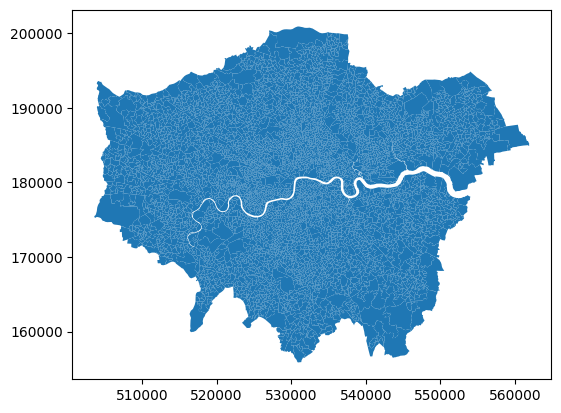

In [6]:
lsoa.plot()
plt.show()